In [16]:
import numpy as np
import pymap3d.vincenty as pmv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

data_dir = "../data/Dynamic/GSDC2021/RouteSU/Results_R_SU_e2e/"
def vincenty_distance(llh1, llh2):
    """
    Args:
        llh1 : [longitude,latitude] (deg)
        llh2 : [longitude,latitude] (deg)
    Returns:
        d : distance between llh1 and llh2 (m)
    """
    d, az = np.array(pmv.vdist(llh1[:, 1], llh1[:, 0], llh2[:, 1], llh2[:, 0]))

    return d


# Compute score
def calc_score(llh, llh_gt):
    """
    Args:
        llh : [longitude,latitude] (deg)
        llh_gt : [longitude,latitude] (deg)
    Returns:
        score : (m)
    """
    d = vincenty_distance(llh, llh_gt)
    score = np.mean([np.quantile(d, 0.50), np.quantile(d, 0.95)])

    return score

# Data Reading - Ground Truth

In [17]:
gt_data_file = data_dir+"GT_PVT_3D.csv"
gt_data = pd.read_csv(gt_data_file, header=None)
gt_ll = gt_data.iloc[:, 1:3].values
gt_h = gt_data.iloc[:, -1].values

# Data Reading - EKF

In [18]:
ekf_data_file = data_dir+"EKF_PVT_3D.csv"
ekf_data = pd.read_csv(ekf_data_file, header=None)
ekf_ll = ekf_data.iloc[:, 1:3].values
ekf_h = ekf_data.iloc[:, -1].values

d_ekf = vincenty_distance(ekf_ll, gt_ll)

score_ekf = calc_score(ekf_ll,gt_ll)
score_ekf


11.453613210993497

# Data Reading - RTS horizontally

In [19]:
rts_data_file = data_dir+"RTS_PVT_3D.csv"
rts_data = pd.read_csv(rts_data_file, header=None)
rts_ll = rts_data.iloc[:, 1:3].values
rts_h = rts_data.iloc[:, -1].values

d_rts = vincenty_distance(rts_ll, gt_ll)

score_rts = calc_score(rts_ll,gt_ll)
score_rts

10.762848857538987

# Data Reading - EKF Test

In [20]:
ekf_data_file_test = data_dir+"EKF_PVT_3D_test.csv"
ekf_data_test = pd.read_csv(ekf_data_file_test, header=None)
ekf_ll_test = ekf_data_test.iloc[:, 1:3].values
ekf_h_test = ekf_data_test.iloc[:, -1].values

d_ekf_test = vincenty_distance(ekf_ll_test, gt_ll)

score_ekf_test = calc_score(ekf_ll_test,gt_ll)
score_ekf_test

9.656400213352372

# Data Reading - RTS Test

In [21]:
rts_data_file_test = data_dir+"RTS_PVT_3D_test.csv"
rts_data_test = pd.read_csv(rts_data_file_test, header=None)
rts_ll_test = rts_data_test.iloc[:, 1:3].values
rts_h_test = rts_data_test.iloc[:, -1].values

d_rts_test = vincenty_distance(rts_ll_test, gt_ll)

score_rts_test = calc_score(rts_ll_test,gt_ll)
score_rts_test

7.6378801608563105

# Data Reading - PrFormer

In [113]:
rtsPF_data_file_test = data_dir+"RTS_PVT_3D_prFormer_test.csv"
rtsPF_data_test = pd.read_csv(rtsPF_data_file_test, header=None)
rtsPF_ll_test = rtsPF_data_test.iloc[:, 1:3].values
rtsPF_h_test = rtsPF_data_test.iloc[:, -1].values

d_rtsPF_test = vincenty_distance(rtsPF_ll_test, gt_ll)

score_rtsPF_test = calc_score(rtsPF_ll_test,gt_ll)
score_rtsPF_test

18.477595805564814

# Data Reading - End-to-end PrNet

In [22]:
e2ePF_data_file_test = data_dir+"WLS_PVT_3D_e2ePrNet_NoisyTime.csv"
e2ePF_data_file_gt = data_dir+"GT_PVT_3D_e2ePrNet_NoisyTime.csv"

e2ePF_data_test = pd.read_csv(e2ePF_data_file_test, header=None)
e2ePF_ll_test = e2ePF_data_test.iloc[:, 1:3].values
e2ePF_h_test = e2ePF_data_test.iloc[:, 3].values
e2ePF_t_test = e2ePF_data_test.iloc[:, -1].values

e2ePF_data_gt = pd.read_csv(e2ePF_data_file_gt, header=None)
e2ePF_ll_gt = e2ePF_data_gt.iloc[:, 1:3].values
e2ePF_h_gt = e2ePF_data_gt.iloc[:, 3].values

d_e2ePF_test = vincenty_distance(e2ePF_ll_test, e2ePF_ll_gt)

score_e2ePF_test = calc_score(e2ePF_ll_test,e2ePF_ll_gt)
score_e2ePF_test

18.520369769877576

# Data Reading - End-to-end PrNet without clock bias supervision

In [23]:
e2ePFnoT_data_file_test = data_dir+"WLS_PVT_3D_e2ePrNet_NoTime.csv"
e2ePFnoT_data_file_gt = data_dir+"GT_PVT_3D_e2ePrNet_NoTime.csv"

e2ePFnoT_data_test = pd.read_csv(e2ePFnoT_data_file_test, header=None)
e2ePFnoT_ll_test = e2ePFnoT_data_test.iloc[:, 1:3].values
e2ePFnoT_h_test = e2ePFnoT_data_test.iloc[:, 3].values
e2ePFnoT_t_test = e2ePFnoT_data_test.iloc[:, -1].values

e2ePFnoT_data_gt = pd.read_csv(e2ePFnoT_data_file_gt, header=None)
e2ePFnoT_ll_gt = e2ePFnoT_data_gt.iloc[:, 1:3].values
e2ePFnoT_h_gt = e2ePFnoT_data_gt.iloc[:, 3].values

d_e2ePFnoT_test = vincenty_distance(e2ePFnoT_ll_test, e2ePFnoT_ll_gt)

score_e2ePFnoT_test = calc_score(e2ePFnoT_ll_test,e2ePFnoT_ll_gt)
score_e2ePFnoT_test

19.157879063259738

# Data Reading - Random Forest

In [29]:
rf_data_file_test = data_dir+"RTS_PVT_3D_RF_test.csv"
rf_data_test = pd.read_csv(rf_data_file_test, header=None)
rf_ll_test = rf_data_test.iloc[:, 1:3].values
rf_h_test = rf_data_test.iloc[:, -1].values

d_rf_test = vincenty_distance(rf_ll_test, gt_ll)

score_rf_test = calc_score(rf_ll_test,gt_ll)
score_rf_test

13.67411374141059

# Data Reading -  FCNN-LSTM

In [30]:
lstm_data_file_test = data_dir+"RTS_PVT_3D_LSTM_test.csv"
lstm_data_test = pd.read_csv(lstm_data_file_test, header=None)
lstm_ll_test = lstm_data_test.iloc[:, 1:3].values
lstm_h_test = lstm_data_test.iloc[:, -1].values

d_lstm_test = vincenty_distance(lstm_ll_test, gt_ll)

score_lstm_test = calc_score(lstm_ll_test,gt_ll)
score_lstm_test

13.873997012213838

# Data Reading - WLS

In [24]:
wls_data_file = data_dir+"WLS_PVT_3D.csv"
wls_data = pd.read_csv(wls_data_file, header=None)
wls_ll = wls_data.iloc[:, 1:3].values
wls_h = wls_data.iloc[:, 3].values
wls_t = wls_data.iloc[:, -1].values

d_wls = vincenty_distance(wls_ll, gt_ll)

score_wls = calc_score(wls_ll,gt_ll)
score_wls

20.66549838955152

# Data Reading - WLS Test

In [25]:
wls_data_file_test = data_dir+"WLS_PVT_3D_test.csv"
wls_data_test = pd.read_csv(wls_data_file_test, header=None)
wls_ll_test = wls_data_test.iloc[:, 1:3].values
wls_h_test = wls_data_test.iloc[:, -1].values

d_wls_test = vincenty_distance(wls_ll_test, gt_ll)

score_wls_test = calc_score(wls_ll_test,gt_ll)
score_wls_test

19.524041243623714

# Data Reading - WLS Test without Pseudorange Smoothing

In [26]:
wls_noPS_data_file_test = data_dir+"WLS_PVT_3D_noPS_test.csv"
wls_noPS_data_test = pd.read_csv(wls_noPS_data_file_test, header=None)
wls_noPS_ll_test = wls_noPS_data_test.iloc[:, 1:3].values
wls_noPS_h_test = wls_noPS_data_test.iloc[:, -1].values

d_wls_noPS_test = vincenty_distance(wls_noPS_ll_test, gt_ll)

score_wls_noPS_test = calc_score(wls_noPS_ll_test,gt_ll)
score_wls_noPS_test

18.43411236167225

# Data Reading - MHE

In [27]:
mhe_data_file = data_dir+"MHE_PVT_3D.csv"
mhe_data = pd.read_csv(mhe_data_file, header=None)
mhe_ll = mhe_data.iloc[:, 1:3].values
mhe_h = mhe_data.iloc[:, -1].values

d_mhe = vincenty_distance(mhe_ll, gt_ll)

score_mhe = calc_score(mhe_ll,gt_ll)
score_mhe

16.457158066165753

# Data Reading - MHE Test

In [28]:
mhe_data_file_test = data_dir+"MHE_PVT_3D_test.csv"
mhe_data_test = pd.read_csv(mhe_data_file_test, header=None)
mhe_ll_test = mhe_data_test.iloc[:, 1:3].values
mhe_h_test = mhe_data_test.iloc[:, -1].values

d_mhe_test = vincenty_distance(mhe_ll_test, gt_ll)

score_mhe_test = calc_score(mhe_ll_test,gt_ll)
score_mhe_test

14.535927970363243

# Data Reading - Set Transformer

In [29]:
setT_data_file_test = data_dir+"Corrected_Position_set_transformer.csv"
setT_data_file_gt = data_dir+"GT_set_transformer.csv"

setT_data_test = pd.read_csv(setT_data_file_test, header=None)
setT_data_gt = pd.read_csv(setT_data_file_gt, header=None)

setT_ll_test = setT_data_test.iloc[:, 2:0:-1].values
setT_h_test = setT_data_test.iloc[:, -1].values
setT_ll_gt = setT_data_gt.iloc[:, 2:0:-1].values
setT_h_gt = setT_data_gt.iloc[:, -1].values

d_setT_test = vincenty_distance(setT_ll_test, setT_ll_gt)

score_setT_test = calc_score(setT_ll_test, setT_ll_gt)
score_setT_test

19.247167427422745

# ECDF - Horizontal e2e

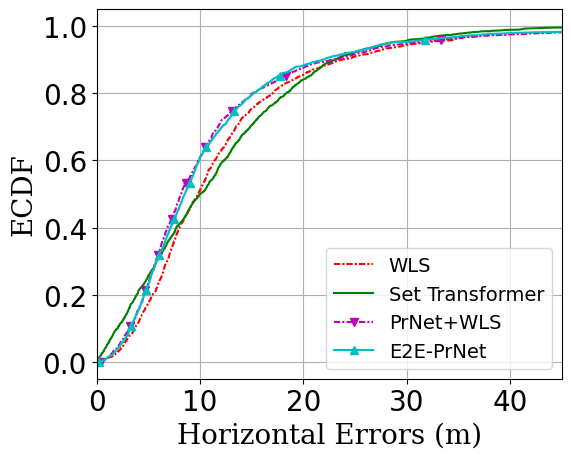

In [30]:
# Horizontal distance without PrNet
x_ekf = np.sort(d_ekf)
y_ekf = np.arange(1, len(x_ekf)+1)/float(len(x_ekf))

x_rts = np.sort(d_rts)
y_rts = np.arange(1, len(x_rts)+1)/float(len(x_rts))

x_wls = np.sort(d_wls)
y_wls = np.arange(1, len(x_wls)+1)/float(len(x_wls))

x_mhe = np.sort(d_mhe)
y_mhe = np.arange(1, len(x_mhe)+1)/float(len(x_mhe))

# Horizontal distance with PrNet
# x_ekf_test = np.sort(d_ekf_test)
# y_ekf_test = np.arange(1, len(x_ekf_test)+1)/float(len(x_ekf_test))

# x_rts_test = np.sort(d_rts_test)
# y_rts_test = np.arange(1, len(x_rts_test)+1)/float(len(x_rts_test))

x_wls_test = np.sort(d_wls_test)
y_wls_test = np.arange(1, len(x_wls_test)+1)/float(len(x_wls_test))

x_wls_noPS_test = np.sort(d_wls_noPS_test)
y_wls_noPS_test = np.arange(1, len(x_wls_noPS_test)+1)/float(len(x_wls_noPS_test))

# x_mhe_test = np.sort(d_mhe_test)
# y_mhe_test = np.arange(1, len(x_mhe_test)+1)/float(len(x_mhe_test))

x_setT_test = np.sort(d_setT_test)
y_setT_test = np.arange(1, len(x_setT_test)+1)/float(len(x_setT_test))

# x_rf_test = np.sort(d_rf_test)
# y_rf_test = np.arange(1, len(x_rf_test)+1)/float(len(x_rf_test))

# x_lstm_test = np.sort(d_lstm_test)
# y_lstm_test = np.arange(1, len(x_lstm_test)+1)/float(len(x_lstm_test))

x_e2ePF_test = np.sort(d_e2ePF_test)
y_e2ePF_test = np.arange(1, len(x_e2ePF_test)+1)/float(len(x_e2ePF_test))

x_e2ePFnoT_test = np.sort(d_e2ePFnoT_test)
y_e2ePFnoT_test = np.arange(1, len(x_e2ePFnoT_test)+1)/float(len(x_e2ePFnoT_test))

# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

linestyle_tuple = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),
     'long dash with offset': (5, (10, 3)),
     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

# Marker step
mstep = 200

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 4.8))

ax.plot(x_wls, y_wls, label = 'WLS', color='r', linestyle=linestyle_tuple['densely dashdotted'])
# plt.plot(x_mhe, y_mhe, label = 'MHE', color='r', linestyle='dashdot')
# plt.plot(x_ekf, y_ekf, label = 'EKF', color='b', linestyle='dashed')
# plt.plot(x_rts, y_rts, label = 'RTS Smoother', color='c', linestyle='dotted')
ax.plot(x_setT_test, y_setT_test, label = 'Set Transformer', color='g', linestyle='solid')
# plt.plot(x_rf_test, y_rf_test, label = 'PBC-RF', color='y', linestyle='solid', marker = 'o', markevery=mstep)
# plt.plot(x_lstm_test, y_lstm_test, label = 'FCNN-LSTM', color='#F97306', linestyle='solid', marker = '*', markevery=mstep)

# ax.plot(x_wls_test, y_wls_test, label = 'PrNet(Smoothed Labels)+WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'], marker = 'v', markevery=mstep)
# ax.plot(x_wls_noPS_test, y_wls_noPS_test, label = 'PrNet(Noisy Labels)+WLS', color='b', linestyle=linestyle_tuple['densely dashdotted'], marker = 'o', markevery=mstep)
ax.plot(x_wls_test, y_wls_test, label = 'PrNet+WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'], marker = 'v', markevery=mstep)
# plt.plot(x_mhe_test, y_mhe_test, label = 'PrNet+MHE', color='r', linestyle='dashdot', marker = '^', markevery=mstep)
# plt.plot(x_ekf_test, y_ekf_test, label = 'PrNet+EKF', color='b', linestyle='dashed',marker = '<', markevery=mstep)
# plt.plot(x_rts_test, y_rts_test, label = 'PrNet+RTS Smoother', color='c', linestyle='dotted',marker = '>', markevery=mstep)
# ax.plot(x_e2ePFnoT_test, y_e2ePFnoT_test, label = 'E2E-PrNet (No Clock Offset Label)', color='m', marker = 'o', linestyle=linestyle_tuple['densely dashdotted'], markevery=mstep)
ax.plot(x_e2ePF_test, y_e2ePF_test, label = 'E2E-PrNet', color='c', marker = '^', linestyle='solid', markevery=mstep)
plt.xlim([0, 100])
plt.grid(True)

# naming the x axis
plt.xlabel('Horizontal Errors (m)', fontdict = font)
# naming the y axis
plt.ylabel('ECDF', fontdict = font)
 
# show a legend on the plot
plt.legend(fontsize = "14")

# Set the range of x
plt.xlim([0,45])

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.figsize=(10, 4.2)
  
# function to show the plot
plt.show()

# x_ekf-x_ekf_test

# Horizontal Errors versus Time

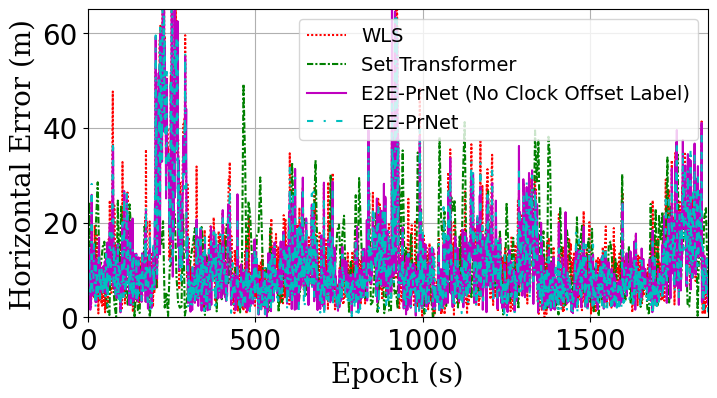

In [71]:
# Plot positioning errors
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(8, 4))
ax.set_ylabel('Horizontal Error (m)', fontdict=font)
ax.set_xlabel('Epoch (s)', fontdict=font)
# ax.set_xlim(0, 3650)
ax.set_xlim(0, 1850)
ax.set_ylim(0, 65)

timesteps = range(d_wls.shape[0])
timesteps_setT = range(d_setT_test.shape[0])

ax.plot(d_wls, label = 'WLS', color='r', linestyle=linestyle_tuple['densely dotted']) 
ax.plot(timesteps_setT[0:-1:5], d_setT_test[0:-1:5], label = 'Set Transformer', color='g', linestyle=linestyle_tuple['densely dashdotted'])
ax.plot(d_e2ePFnoT_test, label = 'E2E-PrNet (No Clock Offset Label)', color='m', linestyle='solid')
ax.plot(d_e2ePF_test, label = 'E2E-PrNet', color='c', linestyle=linestyle_tuple['dashdotted'])

ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.legend(fontsize = "14")


# Parameter Selection for Theseus

/var/folders/nq/x0wqwxd15t39mymhgj8qmjs80000gn/T/ipykernel_12139/3633822688.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label_backward_method, rotation=45, ha='right')


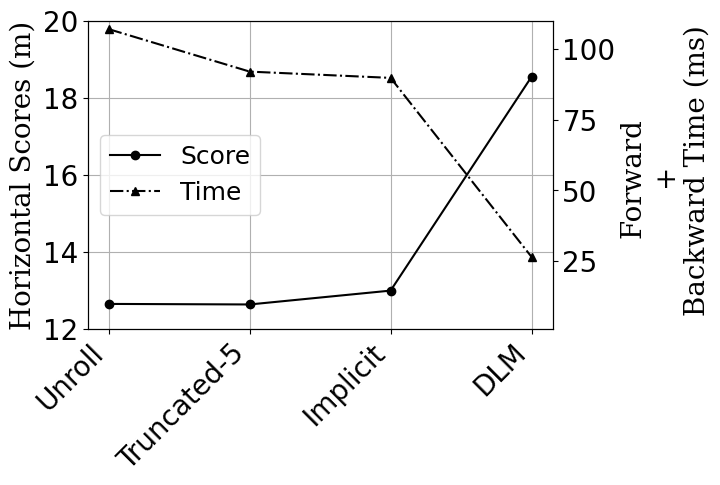

In [353]:
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

# fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 7),gridspec_kw={'width_ratios': [1, 1]})
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 4))

# ************************ Horizontal errors and forward+backward time for various differentiation method *********************

label_backward_method = ["Unroll","Truncated-5", "Implicit", "DLM"]
Horizontal_error_1 = [6.7770, 7.0190, 7.2591, 16.3882]
Horizontal_error_2 = [18.5204, 18.2503, 18.7302, 20.7074]
Horizontal_error = (np.array(Horizontal_error_1)+np.array(Horizontal_error_2))/2
Forward_backward_time = [107.07, 92.05, 89.83, 26.49]

color = 'black'
# ax.set_xlabel('Backward Modes', fontdict=font)
ax.set_ylabel('Horizontal Scores (m)', color=color, fontdict=font)
lns1 = ax.plot(label_backward_method, Horizontal_error, color=color, marker = 'o', linestyle='solid', label = 'Score')
# ax[0].plot(label_backward_method, Horizontal_error_2, color=color, marker = 's', linestyle='dashed',label = 'Scenario 2')
ax.tick_params(axis='y', labelcolor=color)
ax.set_ylim(12, 20)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'black'
ax2.set_ylabel('Forward \n+\n Backward Time (ms)', color=color, fontdict=font)  # we already handled the x-label with ax1
lns2 = ax2.plot(label_backward_method, Forward_backward_time, color=color, marker = '^', linestyle='dashdot', label = 'Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1,110)
ax.grid(True)
ax.set_xticklabels(label_backward_method, rotation=45, ha='right')
# show a legend on the plot
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=18, loc=6)


# # ************************ Horizontal errors and forward+backward time for various linear solver *********************

# label_backward_method = ["Dense", "CHOLMOD"]
# Horizontal_error_1 = [6.7770, 2.5]
# Horizontal_error_2 = [18.5204, 20]
# Horizontal_error = (np.array(Horizontal_error_1)+np.array(Horizontal_error_2))/2
# Forward_backward_time = [0, 1663.10]
 
# color = 'black'
# ax[1].set_xlabel('Linear Solvers', fontdict=font)
# ax[1].set_ylabel('Horizontal Scores (m)', color=color, fontdict=font)
# lns1 = ax[1].plot(label_backward_method, Horizontal_error, color=color, marker = 'o', linestyle='solid', label = 'Score')
# ax[1].tick_params(axis='y', labelcolor=color)

# ax2 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis

# color = 'black'
# ax2.set_ylabel('Forward + Backward Time (ms)', color=color, fontdict=font)  # we already handled the x-label with ax1
# lns2 = ax2.plot(label_backward_method, Forward_backward_time, color=color, marker = '^', linestyle='dashdot', label = 'Time')
# ax2.tick_params(axis='y', labelcolor=color)
# ax[1].grid(True)
# ax[1].set_xticklabels(label_backward_method, rotation=45, ha='right')
# # show a legend on the plot
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax[1].legend(lns, labs, fontsize=18, loc=2)

# fig.tight_layout(pad=3.0)  # otherwise the right y-label is slightly clipped

plt.show()


# Output of PrNet in E2E-PrNet

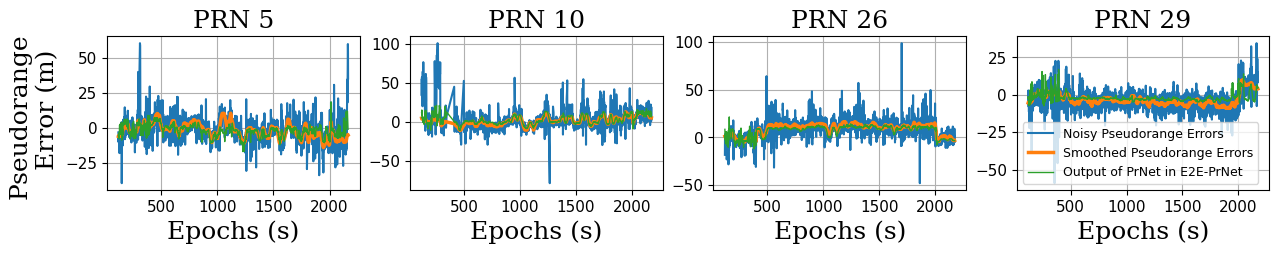

In [374]:
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 2),gridspec_kw={'width_ratios': [1, 1, 1, 1]})

# Import pseudorange data from files
data_dir_prm = "../data/Dynamic/GSDC2021/RouteR/Results_R_e2e/Prm_2020-09-04-US-SF-2_e2ePrNet.csv"
prm_data = pd.read_csv(data_dir_prm)
prm_data_array = np.array(prm_data.iloc[:,:].values)

# Find all required visible satellites as labels
prn_list = [5,10,26,29]

# Categorize each satellite's pseudorange bias estimation
prm_list=[]
for prn, axi in zip(prn_list, ax):
    index_prn = prm_data_array[:,1]==prn
    epoch = prm_data_array[index_prn, 0]
    prm_output = -prm_data_array[index_prn, 2]
    prm_raw = prm_data_array[index_prn, 3]
    prm_smoothed = prm_data_array[index_prn, 4]    
    axi.plot(epoch, prm_raw, label = 'Noisy Pseudorange Errors')
    axi.plot(epoch, prm_smoothed, label = 'Smoothed Pseudorange Errors',linewidth=2.5)
    axi.plot(epoch, prm_output, label = 'Output of PrNet in E2E-PrNet',linewidth=1)
    axi.set_xlabel('Epochs (s)', fontdict=font)
    axi.xaxis.grid(True)
    axi.yaxis.grid(True)
    axi.set_title('PRN '+str(prn), fontdict=font)
    axi.tick_params(labelsize=11)
    
# ax.set_xticklabels(labels, fontdict=font)
# ax.set_ylabel('Pseudorange Bias Estimation (m)', fontdict=font)

# ax.yaxis.grid(True)

# show a legend on the plot
ax[3].legend(fontsize = "9")
ax[0].set_ylabel('Pseudorange \n Error (m)', fontdict=font)

plt.show()

# State Estimation of E2E-PrNet

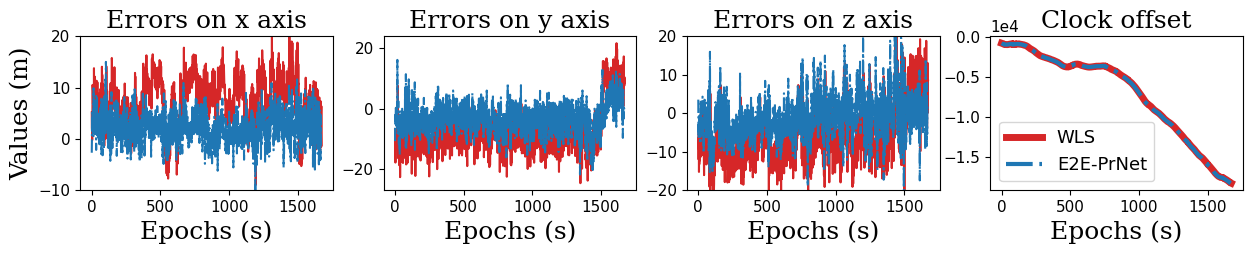

In [326]:
from coordinates import geodetic2ecef
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 2),gridspec_kw={'width_ratios': [1, 1, 1, 1]})

# ******************************** Location ground truth ********************************
gt_lla = np.concatenate((np.array(gt_ll[:,1:2]), np.array(gt_ll[:,0:1]), np.expand_dims(np.array(gt_h), axis=1)), axis=1)
gt_xyz = geodetic2ecef(gt_lla)


# ******************************* WLS-based state estimation *******************************
# Latitude, Longitude, and altitude
wls_lla = np.concatenate((np.array(wls_ll[:,1:2]), np.array(wls_ll[:,0:1]), np.expand_dims(np.array(wls_h), axis=1)), axis=1)
wls_xyz = geodetic2ecef(wls_lla)
error_xyz = wls_xyz-gt_xyz

# ******************************* E2E-PrNet state estimation *******************************
e2ePF_lla_gt = np.concatenate((np.array(e2ePF_ll_gt[:,1:2]), np.array(e2ePF_ll_gt[:,0:1]), np.expand_dims(np.array(e2ePF_h_gt), axis=1)), axis=1)
e2ePF_xyz_gt = geodetic2ecef(e2ePF_lla_gt)

e2ePF_lla = np.concatenate((np.array(e2ePF_ll_test[:,1:2]), np.array(e2ePF_ll_test[:,0:1]), np.expand_dims(np.array(e2ePF_h_test), axis=1)), axis=1)
e2ePF_xyz = geodetic2ecef(e2ePF_lla)
error_e2ePF_xyz = e2ePF_xyz - e2ePF_xyz_gt


color = 'tab:red'
color1 = 'tab:blue'
ax[0].set_xlabel('Epochs (s)', fontdict=font)
ax[0].set_ylabel('Values (m)', fontdict=font)
ax[0].plot(error_xyz[2000:,0], color=color, linestyle='solid', label = 'WLS')
ax[0].plot(error_e2ePF_xyz[2000:,0], color=color1, linestyle='dashdot', label = 'E2E-PrNet')
ax[0].tick_params(labelsize=11)
ax[0].set_title("Errors on x axis", fontdict=font)
ax[0].set_ylim(-10, 20)

ax[1].set_xlabel('Epochs (s)', fontdict=font)
# ax[1].set_ylabel('Errors on y (m)', fontdict=font)
ax[1].plot(error_xyz[2000:,1], color=color, linestyle='solid', label = 'WLS')
ax[1].plot(error_e2ePF_xyz[2000:,1], color=color1, linestyle='dashdot', label = 'E2E-PrNet')
ax[1].tick_params(labelsize=11)
ax[1].set_title("Errors on y axis", fontdict=font)

ax[2].set_xlabel('Epochs (s)', fontdict=font)
# ax[1].set_ylabel('Errors on y (m)', fontdict=font)
ax[2].plot(error_xyz[2000:,2], color=color, linestyle='solid', label = 'WLS')
ax[2].plot(error_e2ePF_xyz[2000:,2], color=color1, linestyle='dashdot', label = 'E2E-PrNet')
ax[2].tick_params(labelsize=11)
ax[2].set_title("Errors on z axis", fontdict=font)
ax[2].set_ylim(-20, 20)

e2ePF_t = np.array(e2ePF_t_test)
ax[3].set_xlabel('Epochs (s)', fontdict=font)
# ax[1].set_ylabel('Errors on y (m)', fontdict=font)
ax[3].plot(wls_t[2000:], color=color, linestyle='solid',linewidth=5 , label = 'WLS')
ax[3].plot(e2ePF_t[2000:], color=color1, linestyle='dashdot',linewidth=3 , label = 'E2E-PrNet')
ax[3].tick_params(labelsize=11)
ax[3].set_title("Clock offset", fontdict=font)
ax[3].ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
ax[3].yaxis.get_offset_text().set_fontsize(11)
ax[3].legend(fontsize = 13)
# ax[3].set_ylim(-20, 20)

# fig.tight_layout(pad=0)


# ECDF - Horizontal

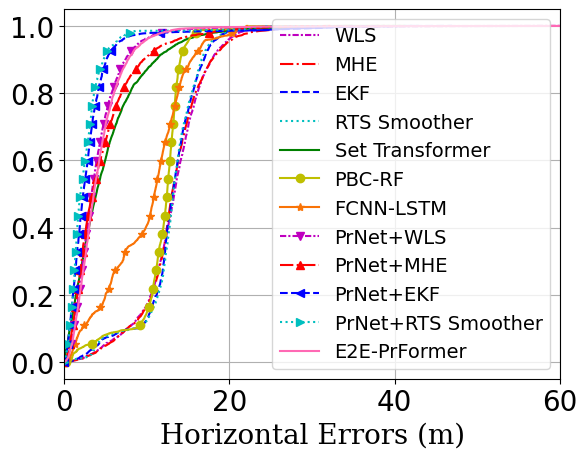

In [82]:
# Horizontal distance without PrNet
x_ekf = np.sort(d_ekf)
y_ekf = np.arange(1, len(x_ekf)+1)/float(len(x_ekf))

x_rts = np.sort(d_rts)
y_rts = np.arange(1, len(x_rts)+1)/float(len(x_rts))

x_wls = np.sort(d_wls)
y_wls = np.arange(1, len(x_wls)+1)/float(len(x_wls))

x_mhe = np.sort(d_mhe)
y_mhe = np.arange(1, len(x_mhe)+1)/float(len(x_mhe))

# Horizontal distance with PrNet
x_ekf_test = np.sort(d_ekf_test)
y_ekf_test = np.arange(1, len(x_ekf_test)+1)/float(len(x_ekf_test))

x_rts_test = np.sort(d_rts_test)
y_rts_test = np.arange(1, len(x_rts_test)+1)/float(len(x_rts_test))

x_wls_test = np.sort(d_wls_test)
y_wls_test = np.arange(1, len(x_wls_test)+1)/float(len(x_wls_test))

x_mhe_test = np.sort(d_mhe_test)
y_mhe_test = np.arange(1, len(x_mhe_test)+1)/float(len(x_mhe_test))

x_setT_test = np.sort(d_setT_test)
y_setT_test = np.arange(1, len(x_setT_test)+1)/float(len(x_setT_test))

x_rf_test = np.sort(d_rf_test)
y_rf_test = np.arange(1, len(x_rf_test)+1)/float(len(x_rf_test))

x_lstm_test = np.sort(d_lstm_test)
y_lstm_test = np.arange(1, len(x_lstm_test)+1)/float(len(x_lstm_test))

x_e2ePF_test = np.sort(d_e2ePF_test)
y_e2ePF_test = np.arange(1, len(x_e2ePF_test)+1)/float(len(x_e2ePF_test))

# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

linestyle_tuple = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),
     'long dash with offset': (5, (10, 3)),
     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

# Marker step
mstep = 200 #5

plt.plot(x_wls, y_wls, label = 'WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'])
plt.plot(x_mhe, y_mhe, label = 'MHE', color='r', linestyle='dashdot')
plt.plot(x_ekf, y_ekf, label = 'EKF', color='b', linestyle='dashed')
plt.plot(x_rts, y_rts, label = 'RTS Smoother', color='c', linestyle='dotted')
plt.plot(x_setT_test, y_setT_test, label = 'Set Transformer', color='g', linestyle='solid')
plt.plot(x_rf_test, y_rf_test, label = 'PBC-RF', color='y', linestyle='solid', marker = 'o', markevery=mstep)
plt.plot(x_lstm_test, y_lstm_test, label = 'FCNN-LSTM', color='#F97306', linestyle='solid', marker = '*', markevery=mstep)

plt.plot(x_wls_test, y_wls_test, label = 'PrNet+WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'], marker = 'v', markevery=mstep)
plt.plot(x_mhe_test, y_mhe_test, label = 'PrNet+MHE', color='r', linestyle='dashdot', marker = '^', markevery=mstep)
plt.plot(x_ekf_test, y_ekf_test, label = 'PrNet+EKF', color='b', linestyle='dashed',marker = '<', markevery=mstep)
plt.plot(x_rts_test, y_rts_test, label = 'PrNet+RTS Smoother', color='c', linestyle='dotted',marker = '>', markevery=mstep)

plt.plot(x_e2ePF_test, y_e2ePF_test, label = 'E2E-PrFormer', color='#FF69B4', linestyle='solid')

plt.xlim([0, 100])
plt.grid(True)

# naming the x axis
plt.xlabel('Horizontal Errors (m)', fontdict = font)
# naming the y axis
# plt.ylabel('ECDF', fontdict = font)
 
# show a legend on the plot
plt.legend(fontsize = "14")

# Set the range of x
plt.xlim([0,60])

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
  
# function to show the plot
plt.show()

# x_ekf-x_ekf_test

# Motivation Diagram

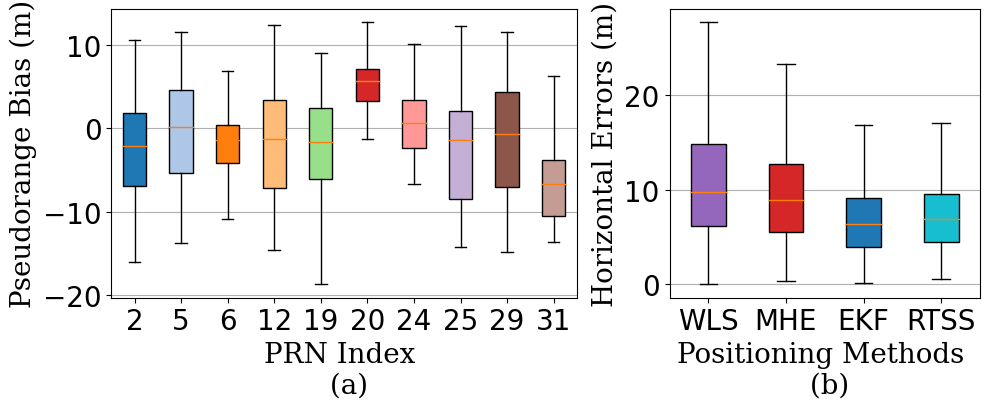

In [173]:
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4.2),gridspec_kw={'width_ratios': [1.5, 1]})

# ******************************* Horizontal distance without PrNet *******************************
x_ekf = np.sort(d_ekf)

x_rts = np.sort(d_rts)

x_wls = np.sort(d_wls)

x_mhe = np.sort(d_mhe)

all_data = [x_wls, x_mhe, x_ekf, x_rts]
labels = ['WLS', 'MHE', 'EKF', 'RTSS']

# rectangular box plot
bplot1 = ax[1].boxplot(all_data,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=labels, # will be used to label x-ticks
                        showfliers = False) # Hide outliers

# fill with colors
colors = ['tab:purple', 'tab:red', 'tab:blue', 'tab:cyan']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# ax[0].set_xticklabels(labels, fontdict=font)
ax[1].set_xlabel('Positioning Methods \n (b)', fontdict=font)
ax[1].set_ylabel('Horizontal Errors (m)', fontdict=font)
ax[1].yaxis.grid(True)

# ******************************* Pseudorange Bias *******************************
# Import pseudorange data from files
data_dir_prm = "../data/Dynamic/Data4QE/RouteSU/Testing/SvPVT3D_Error_label_dynamic_2021-04-28-US-MTV-1.csv"
prm_data = pd.read_csv(data_dir_prm)
prm_data_array = np.array(prm_data.iloc[:,:].values)

# Find all unique visible satellites as labels
prn_list = np.unique(prm_data_array[:,1])

# Categorize each satellite's pseudorange bias estimation
prm_list=[]
for prn in prn_list:
    index_prn = prm_data_array[:,1]==prn
    prm_list.append(prm_data_array[index_prn, 34])

# rectangular box plot
bplot2 = ax[0].boxplot(prm_list,
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        labels=prn_list.astype(int), # will be used to label x-ticks
                        showfliers = False) # Hide outliers

# fill with colors
colors = cm.tab20(np.linspace(0, 2, 32))
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

ax[0].set_xlabel('PRN Index \n (a)', fontdict=font)
ax[0].set_ylabel('Pseudorange Error (m)', fontdict=font)
ax[0].yaxis.grid(True)

fig.tight_layout()
plt.show()

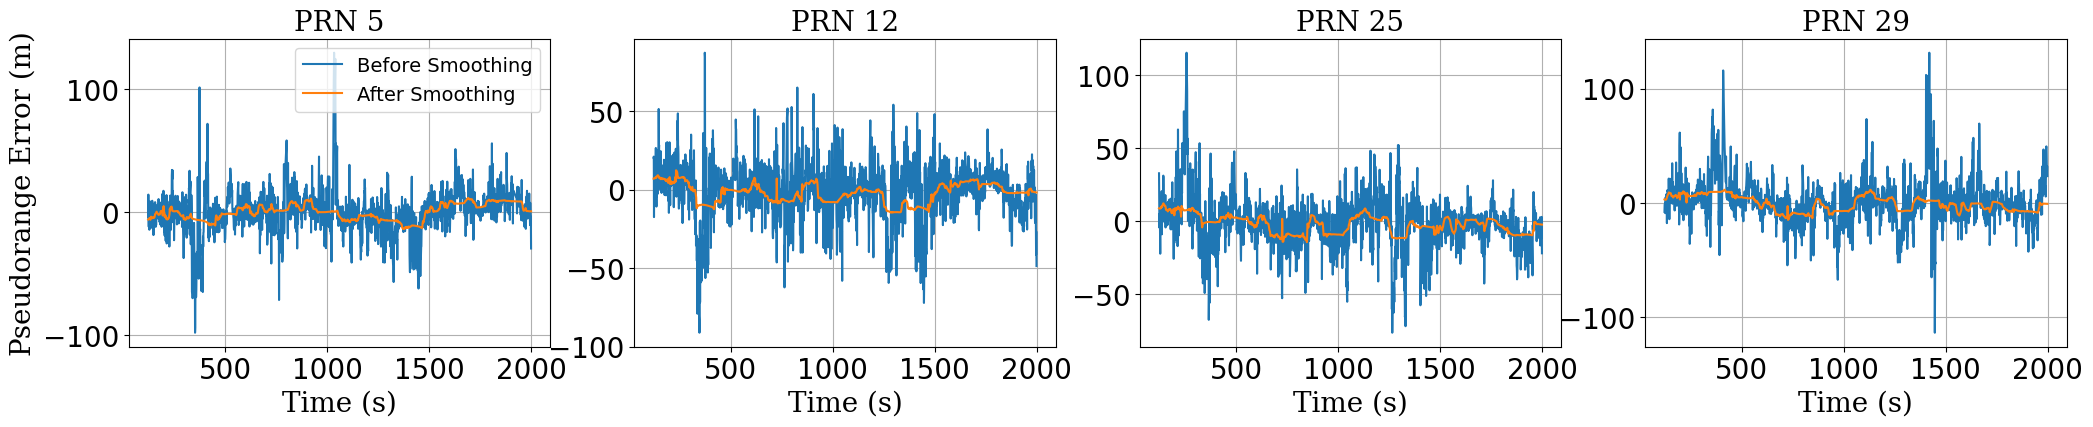

In [194]:
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 4))

# Import pseudorange data from files
data_dir_prm = "../data/Dynamic/Data4QE/RouteSU/Testing/SvPVT3D_Error_label_dynamic_2021-04-28-US-MTV-1.csv"
prm_data = pd.read_csv(data_dir_prm)
prm_data_array = np.array(prm_data.iloc[:,:].values)

# Find all required visible satellites as labels
prn_list = [5,12,25,29]

# Categorize each satellite's pseudorange bias estimation
prm_list=[]
for prn, axi in zip(prn_list, ax):
    index_prn = prm_data_array[:,1]==prn
    epoch = prm_data_array[index_prn, 0]
    prm_raw = prm_data_array[index_prn, 31]
    prm_smoothed = prm_data_array[index_prn, 34]
    axi.plot(epoch, prm_raw, label = 'Before Smoothing')
    axi.plot(epoch, prm_smoothed, label = 'After Smoothing')
    axi.set_xlabel('Time (s)', fontdict=font)
    axi.xaxis.grid(True)
    axi.yaxis.grid(True)
    axi.set_title('PRN '+str(prn), fontdict=font)
    
# ax.set_xticklabels(labels, fontdict=font)
# ax.set_ylabel('Pseudorange Bias Estimation (m)', fontdict=font)

# ax.yaxis.grid(True)

# show a legend on the plot
ax[0].legend(fontsize = "14")
ax[0].set_ylabel('Pseudorange Error (m)', fontdict=font)

plt.show()

# ECDF - Vertical

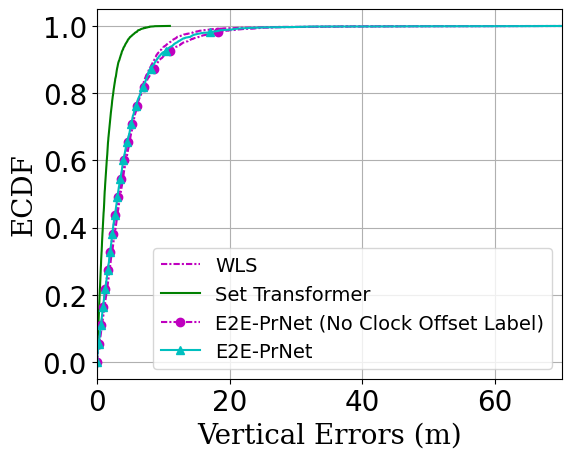

4.429216613228089

In [88]:
# Vertical error without PrNet
# rmse_ekf = np.sqrt(np.mean((ekf_h-gt_h)**2))
rmse_ekf = np.sqrt((ekf_h-gt_h)**2)
x_rmse_ekf = np.sort(rmse_ekf)
y_rmse_ekf = np.arange(1, len(x_rmse_ekf)+1)/float(len(x_rmse_ekf))

# rmse_rts = np.sqrt(np.mean((rts_h-gt_h)**2))
rmse_rts = np.sqrt((rts_h-gt_h)**2)
x_rmse_rts = np.sort(rmse_rts)
y_rmse_rts = np.arange(1, len(x_rmse_rts)+1)/float(len(x_rmse_rts))

# rmse_wls = np.sqrt(np.mean((wls_h-gt_h)**2))
rmse_wls = np.sqrt((wls_h-gt_h)**2)
x_rmse_wls = np.sort(rmse_wls)
y_rmse_wls = np.arange(1, len(x_rmse_wls)+1)/float(len(x_rmse_wls))

# rmse_mhe = np.sqrt(np.mean((mhe_h-gt_h)**2))
rmse_mhe = np.sqrt((mhe_h-gt_h)**2)
x_rmse_mhe = np.sort(rmse_mhe)
y_rmse_mhe = np.arange(1, len(x_rmse_mhe)+1)/float(len(x_rmse_mhe))


# Vertical error with PrNet
# rmse_ekf_test = np.sqrt(np.mean((ekf_h_test-gt_h)**2))
rmse_ekf_test = np.sqrt((ekf_h_test-gt_h)**2)
x_rmse_ekf_test = np.sort(rmse_ekf_test)
y_rmse_ekf_test = np.arange(1, len(x_rmse_ekf_test)+1)/float(len(x_rmse_ekf_test))

# rmse_rts_test = np.sqrt(np.mean((rts_h_test-gt_h)**2))
rmse_rts_test = np.sqrt((rts_h_test-gt_h)**2)
x_rmse_rts_test = np.sort(rmse_rts_test)
y_rmse_rts_test = np.arange(1, len(x_rmse_rts_test)+1)/float(len(x_rmse_rts_test))

# rmse_wls_test = np.sqrt(np.mean((wls_h_test-gt_h)**2))
rmse_wls_test = np.sqrt((wls_h_test-gt_h)**2)
x_rmse_wls_test = np.sort(rmse_wls_test)
y_rmse_wls_test = np.arange(1, len(x_rmse_wls_test)+1)/float(len(x_rmse_wls_test))

# rmse_mhe_test = np.sqrt(np.mean((mhe_h_test-gt_h)**2))
rmse_mhe_test = np.sqrt((mhe_h_test-gt_h)**2)
x_rmse_mhe_test = np.sort(rmse_mhe_test)
y_rmse_mhe_test = np.arange(1, len(x_rmse_mhe_test)+1)/float(len(x_rmse_mhe_test))

rmse_setT_test = np.sqrt((setT_h_test-setT_h_gt)**2)
mean_rmse_setT_test = np.mean(rmse_setT_test)
x_rmse_setT_test = np.sort(rmse_setT_test)
y_rmse_setT_test = np.arange(1, len(x_rmse_setT_test)+1)/float(len(x_rmse_setT_test))

rmse_e2ePN_test = np.sqrt((e2ePF_h_test-e2ePF_h_gt)**2)
mean_rmse_e2ePN_test = np.mean(rmse_e2ePN_test)
x_rmse_e2ePN_test = np.sort(rmse_e2ePN_test)
y_rmse_e2ePN_test = np.arange(1, len(x_rmse_e2ePN_test)+1)/float(len(x_rmse_e2ePN_test))

rmse_e2ePNnoT_test = np.sqrt((e2ePFnoT_h_test-e2ePFnoT_h_gt)**2)
mean_rmse_e2ePNnoT_test = np.mean(rmse_e2ePNnoT_test)
x_rmse_e2ePNnoT_test = np.sort(rmse_e2ePNnoT_test)
y_rmse_e2ePNnoT_test = np.arange(1, len(x_rmse_e2ePNnoT_test)+1)/float(len(x_rmse_e2ePNnoT_test))


# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

linestyle_tuple = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),
     'long dash with offset': (5, (10, 3)),
     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))}

# Marker step
mstep = 200

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 4.8))

ax.plot(x_rmse_wls, y_rmse_wls, label = 'WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'])
# plt.plot(x_rmse_mhe, y_rmse_mhe, label = 'MHE', color='r', linestyle='dashdot')
# plt.plot(x_rmse_ekf, y_rmse_ekf, label = 'EKF', color='b', linestyle='dashed')
# plt.plot(x_rmse_rts, y_rmse_rts, label = 'RTS Smoother', color='c', linestyle='dotted')
ax.plot(x_rmse_setT_test, y_rmse_setT_test, label = 'Set Transformer', color='g', linestyle='solid')

# plt.plot(x_rmse_wls_test, y_rmse_wls_test, label = 'PrNet+WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'], marker = 'v', markevery=200)
# plt.plot(x_rmse_mhe_test, y_rmse_mhe_test, label = 'PrNet+MHE', color='r', linestyle='dashdot', marker = '^', markevery=200)
# plt.plot(x_rmse_ekf_test, y_rmse_ekf_test, label = 'PrNet+EKF', color='b', linestyle='dashed',marker = '<', markevery=200)
# plt.plot(x_rmse_rts_test, y_rmse_rts_test, label = 'PrNet+RTS Smoother', color='c', linestyle='dotted',marker = '>', markevery=200)

ax.plot(x_rmse_e2ePNnoT_test, y_rmse_e2ePNnoT_test, label = 'E2E-PrNet (No Clock Offset Label)', color='m', marker = 'o', linestyle=linestyle_tuple['densely dashdotted'], markevery=mstep)
ax.plot(x_rmse_e2ePN_test, y_rmse_e2ePN_test, label = 'E2E-PrNet', color='c', marker = '^', linestyle='solid', markevery=mstep)


plt.grid(True)

# naming the x axis
plt.xlabel('Vertical Errors (m)', fontdict = font)
# naming the y axi
plt.ylabel('ECDF', fontdict = font)

# show a legend on the plot
plt.legend(fontsize = "14")

# Set the range of x
plt.xlim([0, 70])

# function to show the plot
plt.show()

# mean_rmse_setT_test

np.mean(rmse_wls)

# Cross Phone Model Evaluation

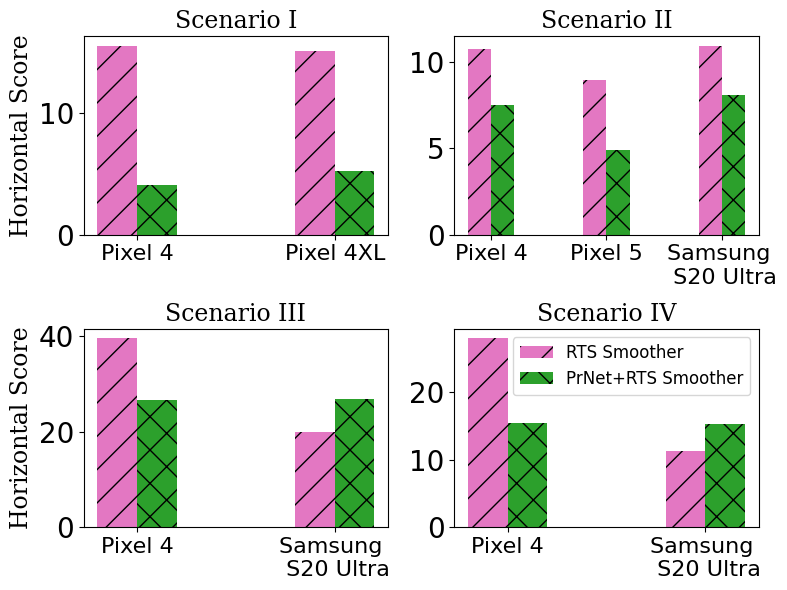

In [212]:
# Set fonts for labels and axes
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 17,
        }

# Four scenarios
scenarios = np.array([1,2,3,4])

Rts_pixel4 = np.array([15.4753, 10.7628, 39.5918, 27.9890])
Rts_pixel4xl = np.array([15.0245])
Rts_pixel5 = np.array([8.9497])
Rts_samsung = np.array([10.9454, 19.9977, 11.3287])

prnetRts_pixel4 = np.array([4.0887,7.5405,26.6047,15.4384])
prnetRts_pixel4xl = np.array([5.1985])
prnetRts_pixel5 = np.array([4.8801])
prnetRts_samsung = np.array([8.1081, 26.8036, 15.3540])


features1 = ("Pixel 4", "Pixel 4XL")
y_score1 = {'RTS Smoother': np.array([Rts_pixel4[0], Rts_pixel4xl[0]]), 'PrNet+RTS Smoother': np.array([prnetRts_pixel4[0], prnetRts_pixel4xl[0]])}

features2 = ("Pixel 4", "Pixel 5", "Samsung \n S20 Ultra")
y_score2 = {'RTS Smoother': np.array([Rts_pixel4[1], Rts_pixel5[0], Rts_samsung[0]]), 
            'PrNet+RTS Smoother': np.array([prnetRts_pixel4[1], prnetRts_pixel5[0], prnetRts_samsung[0]])}

features3 = ("Pixel 4", "Samsung \n S20 Ultra")
y_score3 = {'RTS Smoother': np.array([Rts_pixel4[2], Rts_samsung[1]]), 'PrNet+RTS Smoother': np.array([prnetRts_pixel4[2], prnetRts_samsung[1]])}

features4 = ("Pixel 4", "Samsung \n S20 Ultra")
y_score4 = {'RTS Smoother': np.array([Rts_pixel4[3], Rts_samsung[2]]), 'PrNet+RTS Smoother': np.array([prnetRts_pixel4[3], prnetRts_samsung[2]])}

# Create a plot
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
patterns = [ "/" , "x", "-" , "+"]
barColors = ["tab:pink","tab:green"]
# Plot grouped vertical bars
width = 0.2  # the width of the bars


# Scenario 1
i = 0
multiplier = 0
x = np.arange(len(features1))  # the label locations
for attribute, measurement in y_score1.items():
    offset = width * multiplier
    rects = ax[0,0].bar(x + offset, measurement, width, label=attribute, hatch = patterns[i], color = barColors[i])
    # ax[0,0].bar_label(rects, padding=3, fontsize=9)
    multiplier += 1
    i +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0,0].set_xticks(x + width/2, features1, fontsize=16)
ax[0,0].set_ylabel('Horizontal Score', fontdict=font)
ax[0,0].set_title('Scenario I', fontdict=font)
# ax[0,0].legend(loc='upper left', fontsize=8)
# ax[0,0].set_ylim(0, 20)
# plt.yticks(fontsize=12)

# Scenario 2
i = 0
multiplier = 0
x = np.arange(len(features2))  # the label locations
width = 0.2
for attribute, measurement in y_score2.items():
    offset = width * multiplier
    rects = ax[0,1].bar(x +offset, measurement, width, label=attribute, hatch = patterns[i], color = barColors[i])
    # ax[0,0].bar_label(rects, padding=3, fontsize=9)
    multiplier += 1
    i +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0,1].set_xticks(x + width/2, features2, fontsize=16)
ax[0,1].set_title('Scenario II', fontdict=font)
# ax[0,1].set_xlim(0, 4)

# Scenario 3
i = 0
multiplier = 0
x = np.arange(len(features3))  # the label locations
width = 0.2
for attribute, measurement in y_score3.items():
    offset = width * multiplier
    rects = ax[1,0].bar(x +offset, measurement, width, label=attribute, hatch = patterns[i], color = barColors[i])
    # ax[0,0].bar_label(rects, padding=3, fontsize=9)
    multiplier += 1
    i +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1,0].set_xticks(x + width/2, features3, fontsize=16)
ax[1,0].set_title('Scenario III', fontdict=font)
ax[1,0].set_ylabel('Horizontal Score', fontdict=font)

# Scenario 4
i = 0
multiplier = 0
x = np.arange(len(features4))  # the label locations
width = 0.2
for attribute, measurement in y_score4.items():
    offset = width * multiplier
    rects = ax[1,1].bar(x +offset, measurement, width, label=attribute, hatch = patterns[i], color = barColors[i])
    # ax[0,0].bar_label(rects, padding=3, fontsize=9)
    multiplier += 1
    i +=1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1,1].set_xticks(x + width/2, features4, fontsize=16)
ax[1,1].set_title('Scenario IV', fontdict=font)
# ax[1,1].set_ylabel('Horizontal Score', fontsize=12)
ax[1,1].legend(loc='upper right', fontsize=12)

fig.tight_layout()
plt.show()

# Feature Engineering

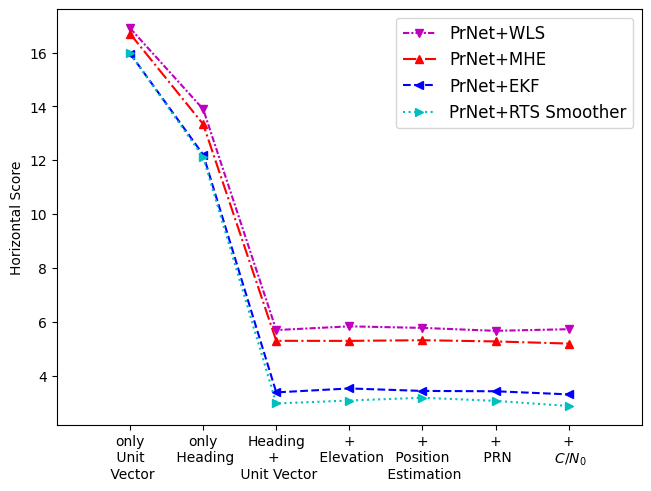

In [31]:
features = ("only\n Unit \n Vector", "only\n Heading", "Heading\n+ \n Unit Vector", "+\n Elevation", "+\n Position \n Estimation", "+\n PRN", "+\n $C/N_0$")
# features = ("2\n+ Heading", "3\n+ Elevation", "4\n+ Position \n Estimation", "5\n+ PRN", "6\n+ $C/N_0$")
x = np.arange(len(features))  # the label locations
y_ekf_2 = np.array([17.937542100736383, 13.027163453494595, 3.0321763636781855, 3.1053083116743063, 2.9758554812610036, 3.053026552386764, 2.85968101866323])
y_rts_2 = np.array([18.208010816049928, 13.050971274990879, 2.6426887273179926, 2.834067679856375, 2.8937742664575876, 2.750897879658986, 2.4801281847549324])
y_wls_2 = np.array([18.61153484867713, 14.154977635214324, 5.455957375701383, 5.424079712516736, 5.335721084186835, 5.273975937884153, 5.352987654968674])
y_mhe_2 = np.array([18.257608400897745, 13.489476476937956, 4.170610082731215, 4.258976433707179, 4.231655924263785, 4.193461804028943, 4.114398235760034])

y_ekf_1 = np.array([13.987693245779436, 11.38778570578043 , 3.7330370064786744, 3.952066023131201,  3.897898822473706,  3.79578090128705,  3.7584364094294505])
y_rts_1 = np.array([13.736150863026719, 11.177260323329094, 3.2998109806098896, 3.3285415588121197, 3.4731914697920634, 3.384883842338086, 3.27510439407431])
y_wls_1 = np.array([15.19350836709171,  13.63990832500948,  5.937282745990626,  6.244614017608191,  6.2176628962456455, 6.061233826078614, 6.103980176643429])
y_mhe_1 = np.array([15.133481812963623, 13.192280038444753, 6.42376083790916,   6.330569961388848,  6.407630315482509,  6.35541696010679,  6.276608744393982])

y_wls = (y_wls_1+y_wls_2)/2
y_mhe = (y_mhe_1+y_mhe_2)/2
y_ekf = (y_ekf_1+y_ekf_2)/2
y_rts = (y_rts_1+y_rts_2)/2


# Create a plot
fig, ax = plt.subplots(layout='constrained')

plt.plot(x+1, y_wls, label = 'PrNet+WLS', color='m', linestyle=linestyle_tuple['densely dashdotted'], marker = 'v', markevery=1)
plt.plot(x+1, y_mhe, label = 'PrNet+MHE', color='r', linestyle='dashdot', marker = '^', markevery=1)
plt.plot(x+1, y_ekf, label = 'PrNet+EKF', color='b', linestyle='dashed',marker = '<', markevery=1)
plt.plot(x+1, y_rts, label = 'PrNet+RTS Smoother', color='c', linestyle='dotted',marker = '>', markevery=1)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Horizontal Score')
ax.set_xticks(x+1, features)
ax.legend(loc='upper right', ncols=1, fontsize=12)
ax.set_xlim(0, 8)

plt.show()